In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [10]:
image_size = (256,256)
batch_size = 16

In [11]:
from keras.preprocessing.image import ImageDataGenerator
#creating a data generator for training and validation.
train_gen =  ImageDataGenerator(rescale = 1./255, horizontal_flip = True)
train_ds = train_gen.flow_from_directory(
    r"D:\Dataset\clothing-dataset-small-master\train",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)

validation_gen = ImageDataGenerator(rescale=1./255, horizontal_flip = True)
val_ds = train_gen.flow_from_directory(
    r"D:\Dataset\clothing-dataset-small-master\validation",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [12]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001), metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, steps_per_epoch = len(train_ds)//batch_size, epochs=500, validation_data=val_ds, validation_steps=len(val_ds)//batch_size)

Epoch 1/500
12/12 [==============================] - 27s 2s/step - loss: 2.0926 - accuracy: 0.3125 - val_loss: 2.2094 - val_accuracy: 0.3125
Epoch 2/500
12/12 [==============================] - 16s 1s/step - loss: 2.1090 - accuracy: 0.2812 - val_loss: 2.1307 - val_accuracy: 0.1875
Epoch 3/500
12/12 [==============================] - 14s 1s/step - loss: 2.0051 - accuracy: 0.3404 - val_loss: 1.9032 - val_accuracy: 0.3125
Epoch 4/500
12/12 [==============================] - 15s 1s/step - loss: 2.0040 - accuracy: 0.2812 - val_loss: 1.8991 - val_accuracy: 0.3125
Epoch 5/500
12/12 [==============================] - 15s 1s/step - loss: 2.0538 - accuracy: 0.3125 - val_loss: 1.8304 - val_accuracy: 0.5625
Epoch 6/500
12/12 [==============================] - 16s 1s/step - loss: 1.8411 - accuracy: 0.4062 - val_loss: 1.8947 - val_accuracy: 0.3750
Epoch 7/500
12/12 [==============================] - 15s 1s/step - loss: 1.9012 - accuracy: 0.3646 - val_loss: 1.6760 - val_accuracy: 0.5625
Epoch 8/500
1

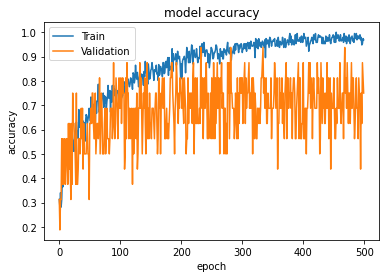

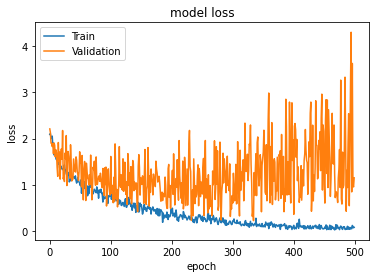

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [13]:
#creating a data generator for testing and validation.
test_gen =  ImageDataGenerator(rescale = 1./255, horizontal_flip = True)
test_ds = test_gen.flow_from_directory(
    r"D:\Dataset\clothing-dataset-small-master\test",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)

Found 372 images belonging to 10 classes.


In [14]:
history1 = model.fit(train_ds, steps_per_epoch = len(train_ds)//batch_size, epochs=500, validation_data=test_ds, validation_steps=len(test_ds)//batch_size)

Epoch 1/500
12/12 [==============================] - 8s 600ms/step - loss: 2.1405 - accuracy: 0.2969 - val_loss: 2.1559 - val_accuracy: 0.1875
Epoch 2/500
12/12 [==============================] - 7s 563ms/step - loss: 2.1803 - accuracy: 0.2396 - val_loss: 2.3562 - val_accuracy: 0.1875
Epoch 3/500
12/12 [==============================] - 7s 548ms/step - loss: 2.1053 - accuracy: 0.2708 - val_loss: 2.0316 - val_accuracy: 0.1875
Epoch 4/500
12/12 [==============================] - 7s 558ms/step - loss: 2.0603 - accuracy: 0.3021 - val_loss: 2.5025 - val_accuracy: 0.0625
Epoch 5/500
12/12 [==============================] - 7s 546ms/step - loss: 2.0832 - accuracy: 0.2708 - val_loss: 2.1985 - val_accuracy: 0.1875
Epoch 6/500
12/12 [==============================] - 7s 560ms/step - loss: 2.0195 - accuracy: 0.3646 - val_loss: 2.0182 - val_accuracy: 0.3125
Epoch 7/500
12/12 [==============================] - 6s 532ms/step - loss: 1.9373 - accuracy: 0.3989 - val_loss: 2.4389 - val_accuracy: 0.1875

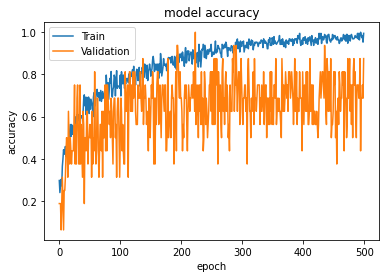

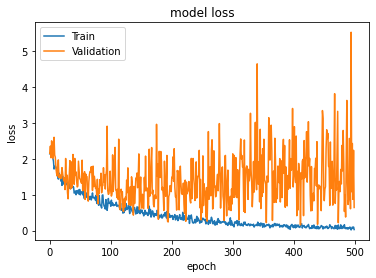

In [15]:
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()